In [2]:
!pip install tensorflow

  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached h5py-3.14.0-cp311-cp311-win_amd64.whl.metadata (2.7 kB)
  Using cached ml_dtypes-0.5.3-cp311-cp311-win_amd64.whl.metadata (9.2 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached rich-14.1.0-py3-none-any.whl.metadata (18 kB)
  Using cached namex-0.1.0-py3-

Epoch 1/100
1/1 - 1s - 872ms/step - loss: 0.1244 - val_loss: 0.1096
Epoch 2/100
1/1 - 0s - 57ms/step - loss: 0.1225 - val_loss: 0.1093
Epoch 3/100
1/1 - 0s - 57ms/step - loss: 0.1220 - val_loss: 0.1086
Epoch 4/100
1/1 - 0s - 55ms/step - loss: 0.1213 - val_loss: 0.1073
Epoch 5/100
1/1 - 0s - 55ms/step - loss: 0.1202 - val_loss: 0.1053
Epoch 6/100
1/1 - 0s - 55ms/step - loss: 0.1184 - val_loss: 0.1028
Epoch 7/100
1/1 - 0s - 57ms/step - loss: 0.1161 - val_loss: 0.0997
Epoch 8/100
1/1 - 0s - 57ms/step - loss: 0.1133 - val_loss: 0.0961
Epoch 9/100
1/1 - 0s - 57ms/step - loss: 0.1101 - val_loss: 0.0923
Epoch 10/100
1/1 - 0s - 56ms/step - loss: 0.1066 - val_loss: 0.0885
Epoch 11/100
1/1 - 0s - 56ms/step - loss: 0.1029 - val_loss: 0.0846
Epoch 12/100
1/1 - 0s - 72ms/step - loss: 0.0992 - val_loss: 0.0808
Epoch 13/100
1/1 - 0s - 60ms/step - loss: 0.0954 - val_loss: 0.0770
Epoch 14/100
1/1 - 0s - 55ms/step - loss: 0.0915 - val_loss: 0.0734
Epoch 15/100
1/1 - 0s - 58ms/step - loss: 0.0878 - val_l

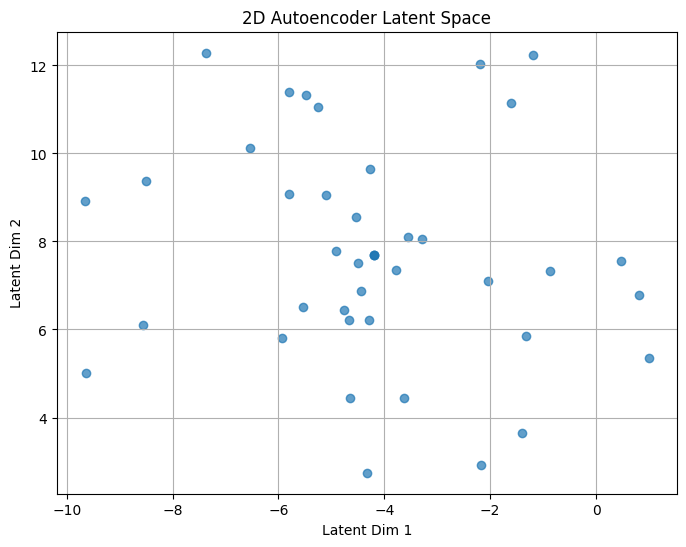

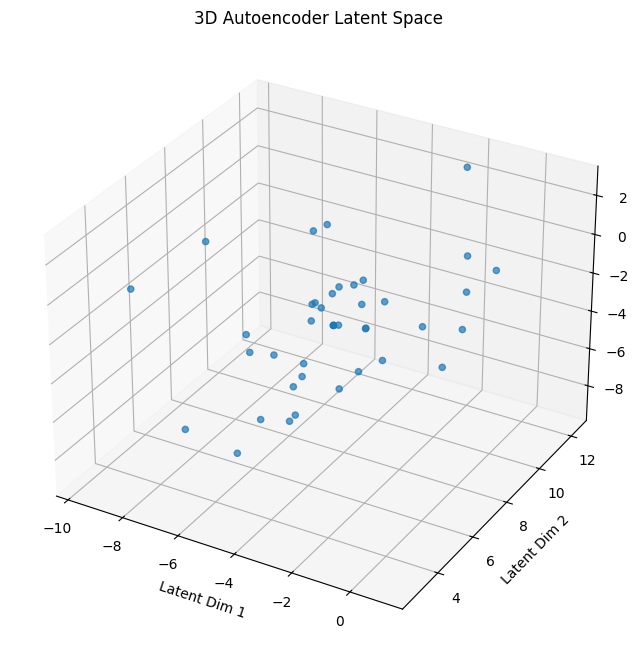

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import joblib

# Load preprocessed features
X = pd.read_csv('features_preprocessed.csv')

# Normalize the data (0 to 1)
X_norm = (X - X.min()) / (X.max() - X.min())
X_norm = X_norm.fillna(0)  # fill any NaNs after normalization

# Convert to numpy array
X_data = X_norm.values.astype('float32')

# Define autoencoder architecture
input_dim = X_data.shape[1]
encoding_dim = 10  # dimension of the bottleneck

input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='linear')(input_layer)
encoded = Dense(32, activation='linear')(encoded)
encoded = Dense(encoding_dim, activation='linear')(encoded)  # bottleneck layer

decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)

# Encoder model for extracting latent space
encoder = Model(inputs=input_layer, outputs=encoded)

autoencoder.compile(optimizer='adam', loss='mse')

# Train autoencoder
history = autoencoder.fit(
    X_data, X_data,
    epochs=100,
    batch_size=32,
    shuffle=True,
    validation_split=0.2,
    verbose=2
)

# Extract latent space representation
X_latent = encoder.predict(X_data, batch_size=32)

# Visualize latent space in 2D or 3D if encoding_dim >= 2 or 3
if encoding_dim >= 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_latent[:, 0], X_latent[:, 1], alpha=0.7)
    plt.xlabel('Latent Dim 1')
    plt.ylabel('Latent Dim 2')
    plt.title('2D Autoencoder Latent Space')
    plt.grid(True)
    plt.show()

if encoding_dim >= 3:
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_latent[:, 0], X_latent[:, 1], X_latent[:, 2], alpha=0.7)
    ax.set_xlabel('Latent Dim 1')
    ax.set_ylabel('Latent Dim 2')
    ax.set_zlabel('Latent Dim 3')
    ax.set_title('3D Autoencoder Latent Space')
    plt.show()
